# Chapter 10 Image Measurements

## Labeling

Labeling is used to identify different objects in an image. The image has to be segmented before labeling can be performed. In a labeled image, all pixels in a given object have the same value.

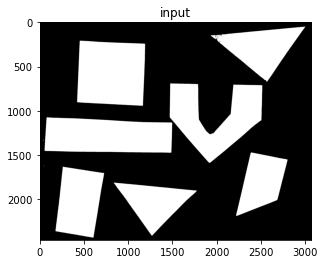

In [1]:
import numpy
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.filters.thresholding import threshold_otsu
# Opening the image and converting it to grayscale.
a = Image.open('../Figures/shape.png').convert('L')
plt.title('input')
plt.imshow(a,cmap='gray')


2492.990906794645 291.8998743531454
1984.5 196.0
803.8963747186616 576.8077374110101
1976.699893104743 1074.7581110110323
757.8821031954108 1284.6004503940458
37.93617021276596 1331.787234042553
2497.7137945359946 1803.9142970187343
44.44444444444444 1623.2962962962963
440.1986128682587 2025.3432109352118
1285.4216111079015 2037.9044273691914


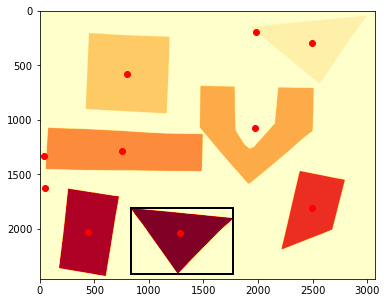

In [2]:
# a is converted to an ndarray.
a = numpy.asarray(a)
# Threshold value is determined by
# using Otsu's method.
thresh = threshold_otsu(a)
# The pixels with intensity greater than
# "theshold" are kept.
b = a > thresh
# Labelling is performed on b.
c = label(b)
# c is saved as label_output.png
cv2.imwrite('../Figures/label_output2.png', c)
# On the labelled image c, regionprops is performed
d = regionprops(c)
# the following command creates an empty plot of
# dimension 6 inch by 6 inch
fig, ax = plt.subplots(ncols=1,nrows=1,
    figsize=(6, 6))
# plots the label image on the
# previous plot using colormap
ax.imshow(c, cmap='YlOrRd')
for i in d:
    # Printing the x and y values of the
    # centroid where centroid[1] is the x value
    # and centroid[0] is the y value.
    print(i.centroid[1], i.centroid[0])
    # Plot a red circle at the centroid, ro stands
    # for red.
    plt.plot(i.centroid[1],i.centroid[0],'ro')
    # In the bounding box, (lr,lc) are the
    # co-ordinates of the lower left corner and
    # (ur,uc) are the co-ordinates
    # of the top right corner.
    lr, lc, ur, uc = i.bbox
    # The width and the height of the bounding box
    # is computed.
    rec_width = uc - lc
    rec_height = ur - lr
    
    # Rectangular boxes with
# origin at (lr,lc) are drawn.
rect = mpatches.Rectangle((lc, lr),rec_width,
    rec_height,fill=False,edgecolor='black', linewidth=2)
# This adds the rectangular boxes to the plot.
ax.add_patch(rect)
# Saving the figure
plt.savefig('../Figures/regionprops_output.png')
plt.show()

## Hough Transform

### Hough Line

Text(0.5, 1.0, 'input')

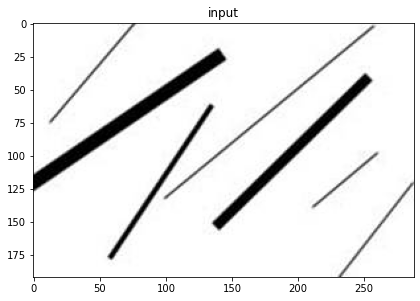

In [3]:
import cv2
import numpy as np
# Opening the image.
im = cv2.imread('../Figures/line.jpg')
# Converting the image to grayscale.
a1 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# Thresholding the image to obtain
# only foreground pixels.
thresh, b1 = cv2.threshold(a1, 0, 255,
    cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2.imwrite('../Figures/hlines_thresh.png', b1)

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(im)
ax1.set_title('input')

# ax1 = fig.add_subplot(1,2,2)
# ax1.imshow(c1)
# ax1.set_title('Output')

# plt.title('Input')
# plt.imshow(im)


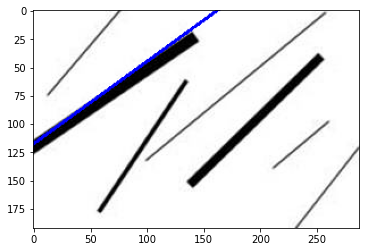

In [4]:
# Performing the Hough lines transform.
lines = cv2.HoughLines(b1, 10, np.pi/20, 200)
for rho, theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(im,(x1,y1),(x2,y2),(0,0,255),2)
cv2.imwrite('../Figures/houghlines_output.png', im)
# Printing the lines: distance and angle in radians.
plt.imshow(im)
# print(lines)

### Hough Circle

Text(0.5, 1.0, 'Output')

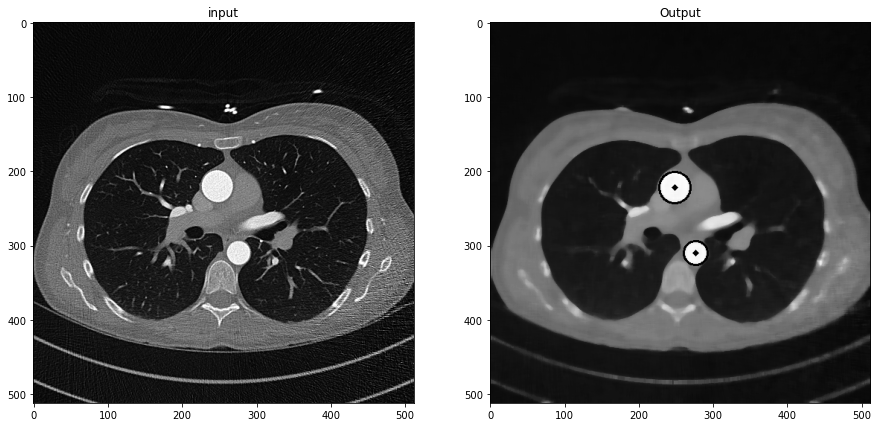

In [18]:
import numpy as np
import scipy.ndimage
from PIL import Image
import cv2
# opening the image and converting it to grayscale
a = Image.open('../Figures/withcontrast1.png')
a = a.convert('L')
# Median filter is performed on the
# image to remove noise.
img = scipy.ndimage.filters.median_filter(a,size=10)
# Circles are determined using
# Hough circles transform.
circles = cv2.HoughCircles(img,
    cv2.HOUGH_GRADIENT,1,10,param1=100,
    param2=30,minRadius=10,maxRadius=30)
# circles image is rounded to unsigned integer 16.
circles = np.uint16(np.around(circles))
# For each detected circle.
for i in circles[0,:]:
# An outer circle is drawn for visualization.
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
# its center is marked
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)
# Saving the image as houghcircles_output.png

fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(a, cmap='gray')
ax1.set_title('input')

ax1 = fig.add_subplot(1,2,2)
ax1.imshow(img, cmap='gray')
ax1.set_title('Output')

# cv2.imwrite('../Figures/houghcircles_output.png', img)
# plt.title("output")
# plt.imshow(img,cmap='gray')

## Template Matching

The number of seats are: 268


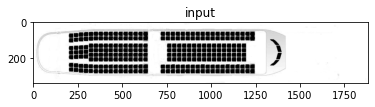

In [6]:
import cv2
import numpy
from PIL import Image
from skimage.morphology import label
from skimage.measure import regionprops
from skimage.feature import match_template
# Opening the image and converting it to grayscale.
image = Image.open('../Figures/airline_seating.png')
image = image.convert('L')
# Converting the input image into an ndarray.
image = numpy.asarray(image)
# Reading the template image.
temp = Image.open('../Figures/template1.png')
temp = temp.convert('L')
# Converting the template into an ndarray.
temp = numpy.asarray(temp)
# Performing template matching.
result = match_template(image, temp) 
thresh = 0.5
# Thresholding the result from template
# matching considering pixel values where the
# normalized cross-correlation is greater than 0.7.
res = result > thresh
# Labeling the thresholded image.
c = label(res, background=0)
# Performing regionprops to count the
# number of label.
reprop = regionprops(c)
print("The number of seats are:", len(reprop))
# Converting the binary image to an 8-bit for storing.
res = res*255
# Converting the ndarray to image.
cv2.imwrite("../Figures/templatematching_output.png",res)
plt.title("input")
plt.imshow(image,cmap='gray')


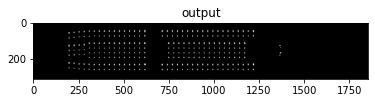

In [7]:
plt.title("output")
plt.imshow(res,cmap='gray')

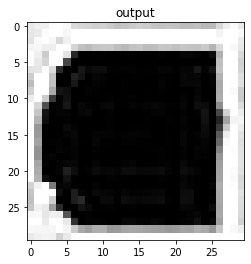

In [8]:
plt.title("output")
plt.imshow(temp,cmap='gray')

## Corner Detector

### FAST Corner Detector

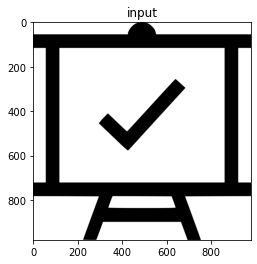

In [14]:
import numpy as np
from PIL import Image
from skimage.feature import corner_peaks
from skimage.feature import corner_subpix, corner_fast
from matplotlib import pyplot as plt
# Image is opened and is converted to grayscale.
img = Image.open('../Figures/check.png').convert('L')

plt.title("input")
plt.imshow(img,cmap='gray')

<ipython-input-17-0dc4836a272a>:4: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.
  cpv = corner_peaks(corner_response, min_distance=50)


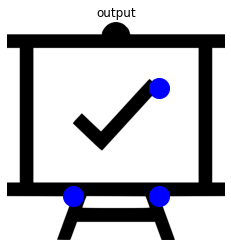

In [17]:
# img is converted to an ndarray.
img1 = np.asarray(img)
corner_response = corner_fast(img1)
cpv = corner_peaks(corner_response, min_distance=50)
corners_subpix_val = corner_subpix(img1, cpv, window_size=13)

fig, ax = plt.subplots()
ax.imshow(img1, interpolation='nearest',
cmap=plt.cm.gray)
x = corners_subpix_val[:, 1]
y = corners_subpix_val[:, 0]
ax.plot(x, y, 'ob', markersize=20)
ax.axis('off')
plt.savefig('../Figures/corner_fast_detector_output.png',dpi=300)

plt.title("output")
plt.imshow(img,cmap='gray')

### Harris Corner Detector

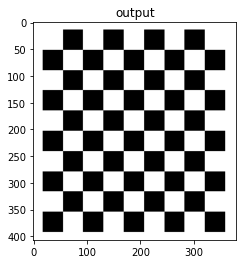

In [11]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from skimage.feature import corner_harris
from skimage.feature import corner_peaks, corner_subpix
# Opening image and converting it into grayscale.
img = Image.open('../Figures/corner.png').convert('L')
# img is converted to an ndarray.
img1 = np.asarray(img)

plt.title("output")
plt.imshow(img,cmap='gray')

<ipython-input-12-d841ef312ad1>:4: FutureWarning: Until version 0.16, threshold_rel was set to 0.1 by default. Starting from version 0.16, the default value is set to None. Until version 0.18, a None value corresponds to a threshold value of 0.1. The default behavior will match skimage.feature.peak_local_max. To avoid this warning, set threshold_rel=0.
  corners_peak_val = corner_peaks(corner_response, 20)


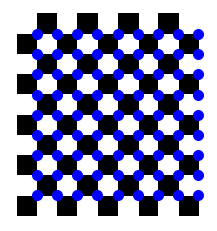

In [12]:
# Detecting corners using Harris.
corner_response = corner_harris(img1, k=0.2)
# Detecting peak values.
corners_peak_val = corner_peaks(corner_response, 20)
corners_subpix_val = corner_subpix(img1,
corners_peak_val, 13)
# Defining a subplot.
fig, ax = plt.subplots()
# Displaying the image.
ax.imshow(img1, interpolation='nearest',cmap=plt.cm.gray)
x = corners_subpix_val[:, 1]
y = corners_subpix_val[:, 0]
ax.plot(x, y, 'ob', markersize=10)
ax.axis('off')
# Saving the image.
plt.savefig('../Figures/corner_harris_detector_output.png',dpi=300)
plt.show()